SVM Implementation

In [82]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

Data = np.genfromtxt("Data.csv", delimiter=",", dtype=float)
Labels1 = np.genfromtxt("Labels.csv", delimiter=",", dtype=int)
Labels2 = np.genfromtxt("Labels.csv", delimiter=",", dtype=int)

In [83]:
H = np.eye(3)
H[0][0] = 0
c = np.ones(10)
label_col = Labels1
label_col.resize((10, 1))
g = Data * label_col # all elements in col i in D is multipled with l[i]

In [84]:
g = np.append(label_col, g, axis=1)

In [85]:
b_w = cp.Variable(3)
prob = cp.Problem(cp.Minimize((1 / 2) * cp.quad_form(b_w, H)), [g @ b_w >= c])
prob.solve()
b = b_w.value[0]
print("The value of  primal objective function is: " + str(prob.value))
print("b* : " + str(b))
print("w1* : " + str(b_w.value[1]))
print("w2* : " + str(b_w.value[2]))


The value of  primal objective function is: 2.666406072048321
b* : 0.9999522656147108
w1* : 1.1546673440982136
w2* : -1.9998888640546553


In [86]:
Q = Data * Labels1
z = cp.Variable(10)
prob = cp.Problem(cp.Minimize((1 / 2) * cp.sum_squares(Q.T @ z) - np.ones(10).T @ z), [z >= np.zeros(10), Labels2 @ z == 0])
prob.solve()
print("The value of dual objective at optimality is: " + str(-prob.value))


The value of dual objective at optimality is: 2.6664824411466275


In [87]:
w1 = b_w.value[1]
w2 = b_w.value[2]
xa = np.array([b, w1, w2])
ch = np.around(g @ xa.T, decimals=3)
print("The primal constraints that are active are: "), # The support vectors
for i in range(0, 10):
    if ch[i] == 1:
        print(i + 1),


The primal constraints that are active are: 
1
2
7
10


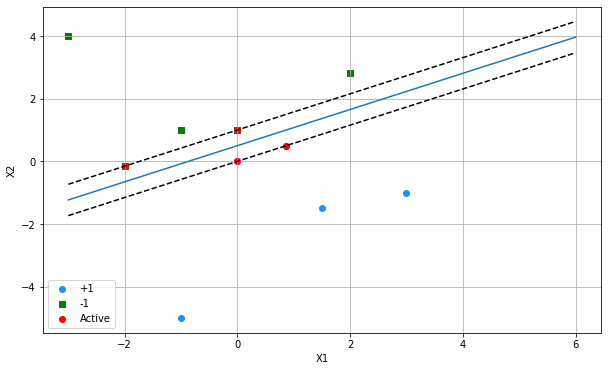

In [88]:
plt.rcParams["figure.figsize"] = (10, 6)
plt.scatter(Data[:5, 0], Data[:5, 1], color='dodgerblue', marker='o', label="+1")
plt.scatter(Data[5:, 0], Data[5:, 1], color='green', marker='s', label="-1")
y = np.linspace(-3, 6, 1000)
plt.plot(y, (-b - w1 * y) / w2)
plt.plot(y, (-b + 1 - w1 * y) / w2, color='black', linestyle='dashed')
plt.plot(y, (-b - 1 - w1 * y) / w2, color='black', linestyle='dashed')
ActiveC = np.array([Data[0], Data[1], Data[6], Data[9]])
plt.scatter(ActiveC[:, 0], ActiveC[:, 1], color='red', label='Active')
plt.axis()
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.legend()
plt.show()
